In [1]:
%env BIGML_USERNAME=vignesh2108
%env BIGML_API_KEY=6fd4c25030dca4bdd0f7c6da344fe295b9fbad25

env: BIGML_USERNAME=vignesh2108
env: BIGML_API_KEY=6fd4c25030dca4bdd0f7c6da344fe295b9fbad25


In [2]:
from bigml.api import BigML
import pandas as pd
from pandas.io import gbq
import json
import numpy as np

In [3]:
news_content = """SELECT title  FROM [not-a-doctor-273222.Topic_Modelling.NewsData]"""
news_content = gbq.read_gbq(news_content,project_id="not-a-doctor-273222")

/Users/vignesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value for dialect is changing to "standard" in a future version of pandas-gbq. Pass in dialect="legacy" to disable this warning.
  
Downloading: 100%|██████████| 2968/2968 [00:00<00:00, 9218.82rows/s]


In [4]:
news_content_uniq=news_content.drop_duplicates()

In [5]:
news_content_uniq.to_csv('news_cont_uniq.csv',index=False)

In [6]:
api = BigML()

In [7]:
source = api.create_source("news_cont_uniq.csv")

In [8]:
api.ok(source)

True

In [9]:
dataset = api.create_dataset(source)

In [10]:
api.ok(dataset)

True

In [11]:
topic_model = api.create_topic_model(dataset, { \
    "name": "TopNewsTopics"
        , "excluded_terms":["coronavirus","covid","rand"]
        ,"term_filters": ["non_language_characters","html_keywords","numeric_digits"]
#       ,"number_of_topics":15
})

In [12]:
api.ok(topic_model)

True

In [13]:
for i in topic_model['object']['topic_model']['topics']:
    print(i['name'])

updates
johnson
health
workers
death
lockdown, hospital
warns
dies
business, insider
business, insider
trump, checks
outbreak
protests
world
crisis
pandemic
trump, americans
testing
amid
insider
thehill
cnn
calls
week
lockdown, people


In [14]:
topiclist=[]
for t in topic_model['object']['topic_model']['topics']:
    if t['top_terms'][0][1]-t['top_terms'][1][1] < 0.01:
        s1=str(t['top_terms'][0][0])+"-"+str(t['top_terms'][1][0])
    else:
        s1=str(t['name'])
    topiclist.append(s1)

In [16]:
file1 = open("FinalTopicsOP.txt","w") 

In [17]:
for t in topic_model['object']['topic_model']['topics']:
    if t['top_terms'][0][1]-t['top_terms'][1][1] < 0.01:
        s1=str(t['top_terms'][0][0])+" "+str(t['top_terms'][1][0])+"\n"
    else:
        s1=str(t['name'])+"\n"
    file1.write(s1)
file1.close()

In [15]:
probslist=[]
for i in topic_model['object']['topic_model']['topics']:
    probslist.append(i['probability'])

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import squarify

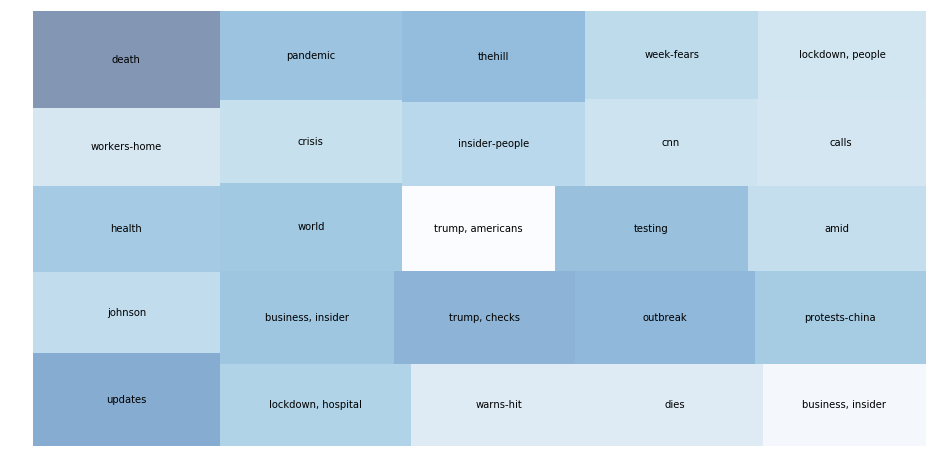

In [17]:
norm = matplotlib.colors.Normalize(vmin=min(probslist), vmax=max(probslist))
colors = [matplotlib.cm.Blues(norm(value)) for value in probslist]
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 8)
squarify.plot(sizes=probslist, label=topiclist, color=colors, alpha=.5 )
plt.axis('off')
plt.show()


In [18]:
topiclist


['updates',
 'johnson',
 'health',
 'workers-home',
 'death',
 'lockdown, hospital',
 'warns-hit',
 'dies',
 'business, insider',
 'business, insider',
 'trump, checks',
 'outbreak',
 'protests-china',
 'world',
 'crisis',
 'pandemic',
 'trump, americans',
 'testing',
 'amid',
 'insider-people',
 'thehill',
 'cnn',
 'calls',
 'week-fears',
 'lockdown, people']

In [24]:
oparr=np.stack((topiclist,probslist),axis=-1)

In [30]:
pd.DataFrame(oparr).to_csv("TopicWeights.csv")

In [ ]:
topicli